#  Take Home Test

## Contents

1) Exploratory data analysis
2) Feature engineering
3) Training
4) Model diagnostics


In [1]:
# Read necessary libraries, import data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 100000000)
import warnings
df = pd.read_excel('input_ml_data.xlsx', sheet_name='E Comm')

In [2]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [9]:
# Perform necessary changes in data types
df.CustomerID = df.CustomerID.astype(object)
df.CityTier = df.CityTier.astype(object)
df.SatisfactionScore = df.SatisfactionScore.astype(object)

In [4]:
# import necessary modules
from src.preprocessing import feature_engineering, eda 

fe = feature_engineering.Preprocess()
eda = eda.Eda()


<AxesSubplot:title={'center':'Churn distribution'}, ylabel='Frequency'>

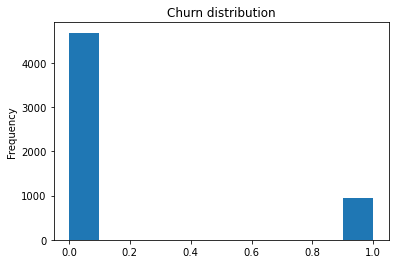

In [4]:
# Exploratory Data Analysis

# Plot target label distribution

df.Churn.plot.hist(title = 'Churn distribution')

`Observations`: 

- There is a clear imbalance problem
- Majority class is 0 (no churn)
- There are several techniques to deal with these cases. Specific paramerter within models, or sampling classes 


In [5]:
# Look for missing values
eda.missing_values_table(df)

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


`Observations`: 

- DaySinceLastOrder has the most missing values with a 5.5 % out of total values
- To make an appropriate decision on imputing missing data, we need to plot the nature of its distributions


<AxesSubplot:ylabel='Frequency'>

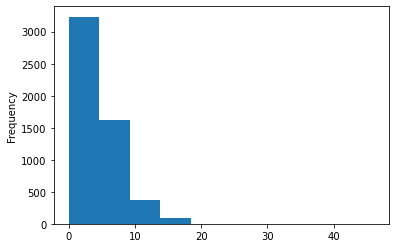

In [8]:
# plot data with missing values
df.DaySinceLastOrder.plot.hist()

<AxesSubplot:ylabel='Frequency'>

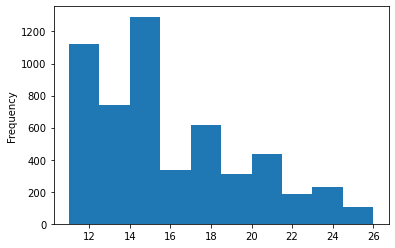

In [9]:
# plot data with missing values
df.OrderAmountHikeFromlastYear.plot.hist()

<AxesSubplot:>

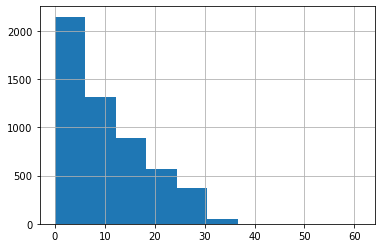

In [10]:
# plot data with missing values
df.Tenure.hist()

<AxesSubplot:>

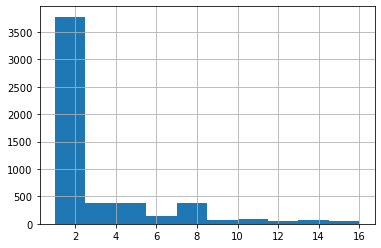

In [11]:
# plot data with missing values
df.OrderCount.hist()

<AxesSubplot:>

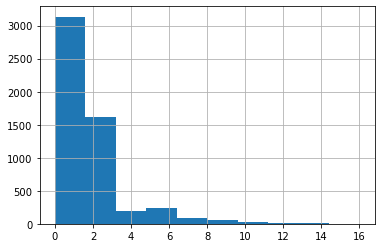

In [12]:
# plot data with missing values
df.CouponUsed.hist()

<AxesSubplot:>

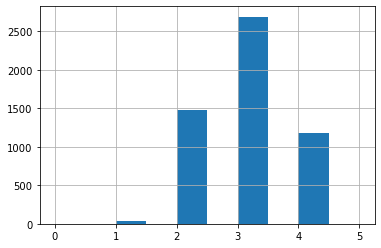

In [13]:
# plot data with missing values
df.HourSpendOnApp.hist()

<AxesSubplot:>

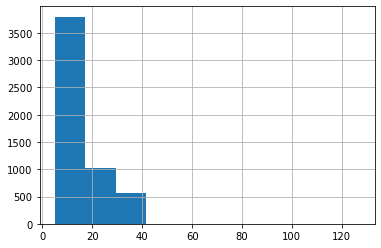

In [14]:
# plot data with missing values
df.WarehouseToHome.hist()

`Observations`: 

- Now that we plotted all distributions from our features with missing values, we can see:
- All features but HourSpendOnApp have skewed / long-tail distributions. HourSpendOnApp has a discrete distribution.
- Based on this information, imputation with mean wouldn't be appropriate since non of them have a normal distribution
- We are going to use the median as a strategy 

<AxesSubplot:title={'center':'Ternure relationship with Churn '}, xlabel='Tenure', ylabel='Density'>

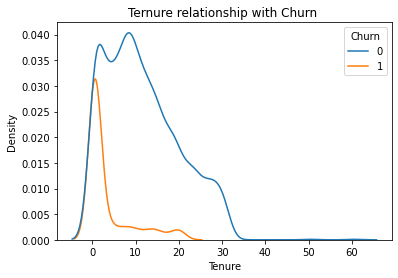

In [124]:
# Exploratory data analysis with target variable

plt.title('Ternure relationship with Churn ')
sns.kdeplot(df['Tenure'] , hue= df['Churn'])


`Observations`: 

- Plot makes sense. Overall, customers have tenure from 0- 10
- Churned customers have the lowest tenure from 0-5

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


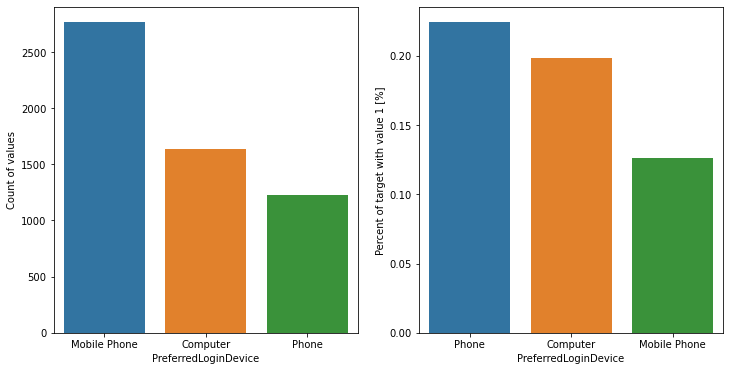

In [16]:
eda.plot_cat_feature(df, 'PreferredLoginDevice', 'Churn')


`Observations`: 
- Both Phone and Computer devices are related with churn with 20%

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


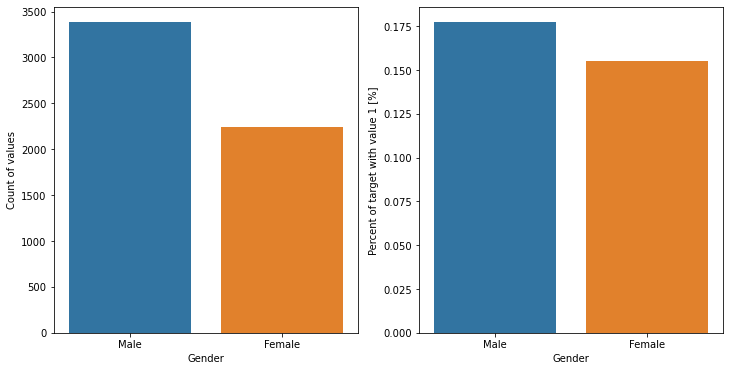

In [18]:
eda.plot_cat_feature(df, 'Gender', 'Churn')

`Observations`: 

- Plot shows there is no discrimination on gender with relationship with Churn

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


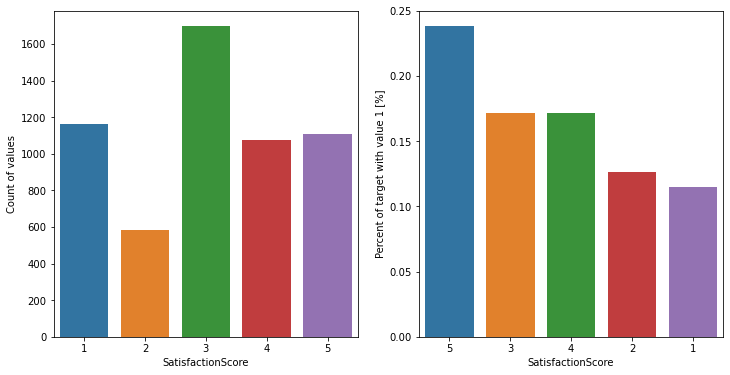

In [11]:
eda.plot_cat_feature(df, 'SatisfactionScore', 'Churn')

`Observations`: 
- Asuming 1 is very unsatisfied and 5 very satisifed:
- Customers with 5, 3, and 4 tend to churn more. It would make sense to further see this variable, perhaps there is a mistake on data collection or this is related with or imbalance class problem.

<AxesSubplot:title={'center':'DaySinceLastOrder relationship with Churn '}, xlabel='DaySinceLastOrder', ylabel='Density'>

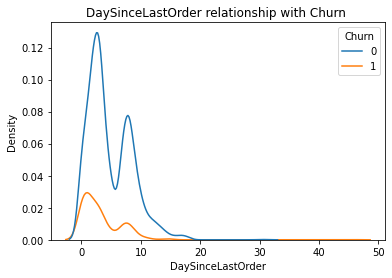

In [17]:

plt.title('DaySinceLastOrder relationship with Churn ')
sns.kdeplot(df['DaySinceLastOrder'] , hue= df['Churn'])

`Observations`: 

- Plot shows there is a slight pick in customers between 0 and 1 days and 9 days since last order

In [18]:
# Check correlations with target variable

correlations = df.corr()['Churn'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 NumberOfAddress             0.043931
WarehouseToHome             0.076630
Complain                    0.084703
NumberOfDeviceRegistered    0.107939
Churn                       1.000000
Name: Churn, dtype: float64

Most Negative Correlations:
 Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154118
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
Name: Churn, dtype: float64


In [19]:
# Display categorical features
features = df.copy()
features.select_dtypes(['object', 'category']).apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

CustomerID              5630
PreferredPaymentMode       7
PreferedOrderCat           6
SatisfactionScore          5
PreferredLoginDevice       3
CityTier                   3
MaritalStatus              3
Gender                     2
dtype: int64

In [42]:
features.HourSpendOnApp / features.Tenure

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,3,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,3,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,1,11.0,1.0,1.0,3.0,129.60


In [43]:
# Feature engineering

features['WarehouseToHome_median_SC'] = features.groupby('SatisfactionScore')['WarehouseToHome'].transform("median")
features['WarehouseToHome_max_SC'] = features.groupby('SatisfactionScore')['WarehouseToHome'].transform("max")
features['WarehouseToHome_min_SC'] = features.groupby('SatisfactionScore')['WarehouseToHome'].transform("min")

features['Tenure_median_SC'] = features.groupby('SatisfactionScore')['Tenure'].transform("median")
features['Tenure_max_SC'] = features.groupby('SatisfactionScore')['Tenure'].transform("max")
features['Tenure_min_SC'] = features.groupby('SatisfactionScore')['Tenure'].transform("min")




`Observations`: 
- The reasoning behind these features is that the Satisfaction score is a worth metric looking for. It could make sense to see statistical aggregations on positively correlated features like WarehouseTohome and Doman business features like Ternure. 


In [44]:
# Prepare dataset for training

target = features.pop('Churn') 
features['Churn'] = target
X = features.iloc[:, :-1]
X.pop('CustomerID')

y = features['Churn']


In [45]:
# caategorical encoding values encoding

X = pd.get_dummies(X)

`Observations`: 

- Since we dont see a lot of categories, one-hot encoding would be the appropriate method

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")  # strategy based on distribution observation
X[:] = imputer.fit_transform(X)

In [47]:
# Techniques to deal with class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from  collections import Counter

# Random Under Sampler
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

#Random over sampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('RandomOverSampler dataset shape', Counter(y_ros))
print('RandomUnderSampler dataset shape', Counter(y_rus))



Original dataset shape Counter({0: 4682, 1: 948})
RandomOverSampler dataset shape Counter({1: 4682, 0: 4682})
RandomUnderSampler dataset shape Counter({0: 948, 1: 948})


In [57]:
# Set up baseline
from numpy import mean
import warnings
from sklearn.ensemble import RandomForestClassifier # baseline of choose
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
warnings.filterwarnings("ignore")

# Initialize baseline with fixed random_state
baseline = RandomForestClassifier(random_state=1, class_weight = 'balanced', max_depth=5, n_estimators=100) # max_depth limited due to overfitting

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=1)


In [58]:
# Scailing data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize  Standarization 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

X_sc = sc.fit_transform(x_rus)

# Fitting model with data
baseline.fit(X_train_sc, y_train)

print(f'Baseline Training Accuracy: {np.mean(baseline.predict(X_train_sc) == y_train)*100:.2f}% ')
print(f'Baseline Test Accuracy: {np.mean(baseline.predict(X_test_sc) == y_test)*100:.2f}% ')

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(baseline, X_sc, y_rus, scoring='roc_auc', cv=cv)
# summarize performance ROC AUC
print('Mean ROC AUC: %.3f' % mean(scores))

Baseline Training Accuracy: 82.88% 
Baseline Test Accuracy: 82.81% 
Mean ROC AUC: 0.889


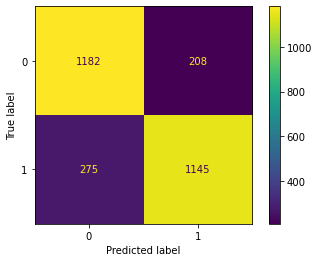

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,baseline.predict(X_test_sc))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

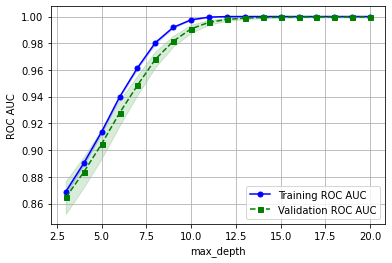

In [60]:
# Model Diagnsotics 

from sklearn.model_selection import validation_curve



max_depth = [3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_scores, test_scores = validation_curve(
                estimator=baseline, 
                X=X_train_sc, 
                y=y_train, 
                param_name='max_depth', 
                param_range = max_depth,
                scoring='roc_auc',
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(max_depth, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training ROC AUC')

plt.fill_between(max_depth, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(max_depth, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation ROC AUC')

plt.fill_between(max_depth, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

`Observations`: 

- Model is potentially good to be a baseline. 
- Confusion matrix shows that our chosen technique to deal with class imbalance is giving decent answers. At least we don't see any bias towards the majority class
- Roc Aun metric is decent given that we haven't done any hyperparameters optimization nor more feature engineering
- Validation curve is telling that model will tend to overfit if we increase de depth of the Random Forest. However, there is a sweet spot with 8 as depth


Preguntas del PDF

¿Que es una matriz de confusión?
- Herramienta que permite visualizar el desempeño del algoritmo
¿Es mejor tener pocos falsos negativos o falsos positivos?
- Depende el nivel de precaución de la empresa. En general creo que es mejor tener falsos negativos 
¿Detección de overfitting y solucionarlo?
- herramientas de diganostico como las validations curves y tomar acciones como añadir más datos o reducir complejidad del modelo
¿Redeucción de la dimensionalidad?
- Lo haría con PCA. Primer vería la varianza acomulada de todos los componentes y son es información elegiría el número de ellos 
¿Tratamiento de missing values?
- Pondría un umbral de missing, si una feature sobrepasa este umbral se concluye que se elimina. De otra manera vería las distribuciones de cada una para elegir una técnica de imputación
Tranformación logaritimica
- Cuando vemos que la distribución esta muy sesgada


